In [63]:
from keras._tf_keras import keras
from keras._tf_keras.keras import layers
from keras._tf_keras.keras.datasets import mnist

import matplotlib.pyplot as plt

### Завантажуємо датасет за допомогою бібліотеки Keras

In [64]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

60000 train samples
10000 test samples
image shape (28, 28)


### Маємо 60к тренувальних цифр та 10к тестових

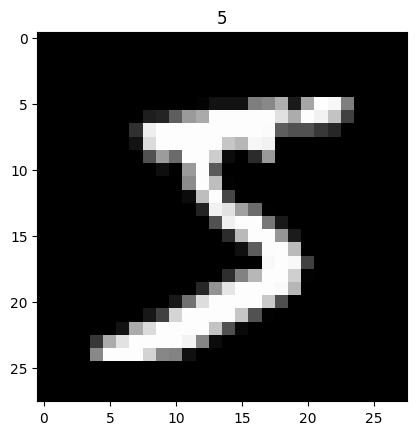

In [65]:
image = x_train[0]

plt.imshow(image, cmap='gray')
plt.title(y_train[0])
plt.show()

### Проведемо препроцесинг масивів для обробки нейронною мережею

In [66]:
input_dim = 28 * 28 #784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
print('input shape: ', x_train.shape[1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input shape:  784


In [67]:
model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10
750/750 - 6s - 8ms/step - accuracy: 0.9378 - loss: 0.2114 - val_accuracy: 0.9636 - val_loss: 0.1220
Epoch 2/10
750/750 - 3s - 4ms/step - accuracy: 0.9737 - loss: 0.0847 - val_accuracy: 0.9743 - val_loss: 0.0932
Epoch 3/10
750/750 - 2s - 3ms/step - accuracy: 0.9830 - loss: 0.0536 - val_accuracy: 0.9719 - val_loss: 0.0972
Epoch 4/10
750/750 - 3s - 3ms/step - accuracy: 0.9876 - loss: 0.0394 - val_accuracy: 0.9740 - val_loss: 0.1010
Epoch 5/10
750/750 - 3s - 4ms/step - accuracy: 0.9900 - loss: 0.0301 - val_accuracy: 0.9752 - val_loss: 0.0930
Epoch 6/10
750/750 - 3s - 4ms/step - accuracy: 0.9911 - loss: 0.0266 - val_accuracy: 0.9758 - val_loss: 0.0940
Epoch 7/10
750/750 - 3s - 4ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9784 - val_loss: 0.0880
Epoch 8/10
750/750 - 3s - 4ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9763 - val_loss: 0.0970
Epoch 9/10
750/750 - 3s - 4ms/step - accuracy: 0.9942 - loss: 0.0171 - val_accuracy: 0.9767 - val_loss: 0.1133
E

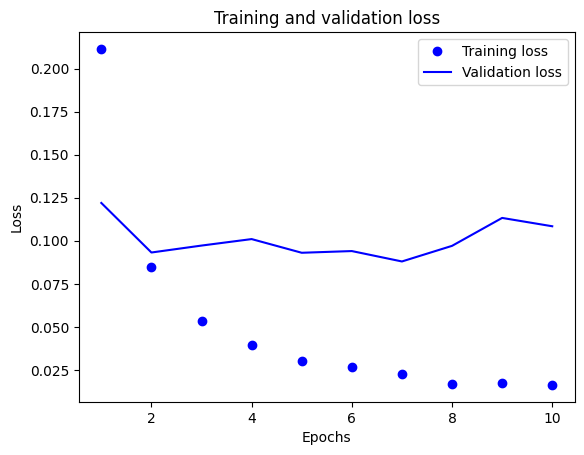

In [69]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [70]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'{model.metrics_names[0]} score:', score[0])
print(f'{model.metrics_names[1]} score:', score[1])

loss score: 0.09404128044843674
compile_metrics score: 0.9771999716758728


### Спробуємо класифікувати самостійно намальовані цифри

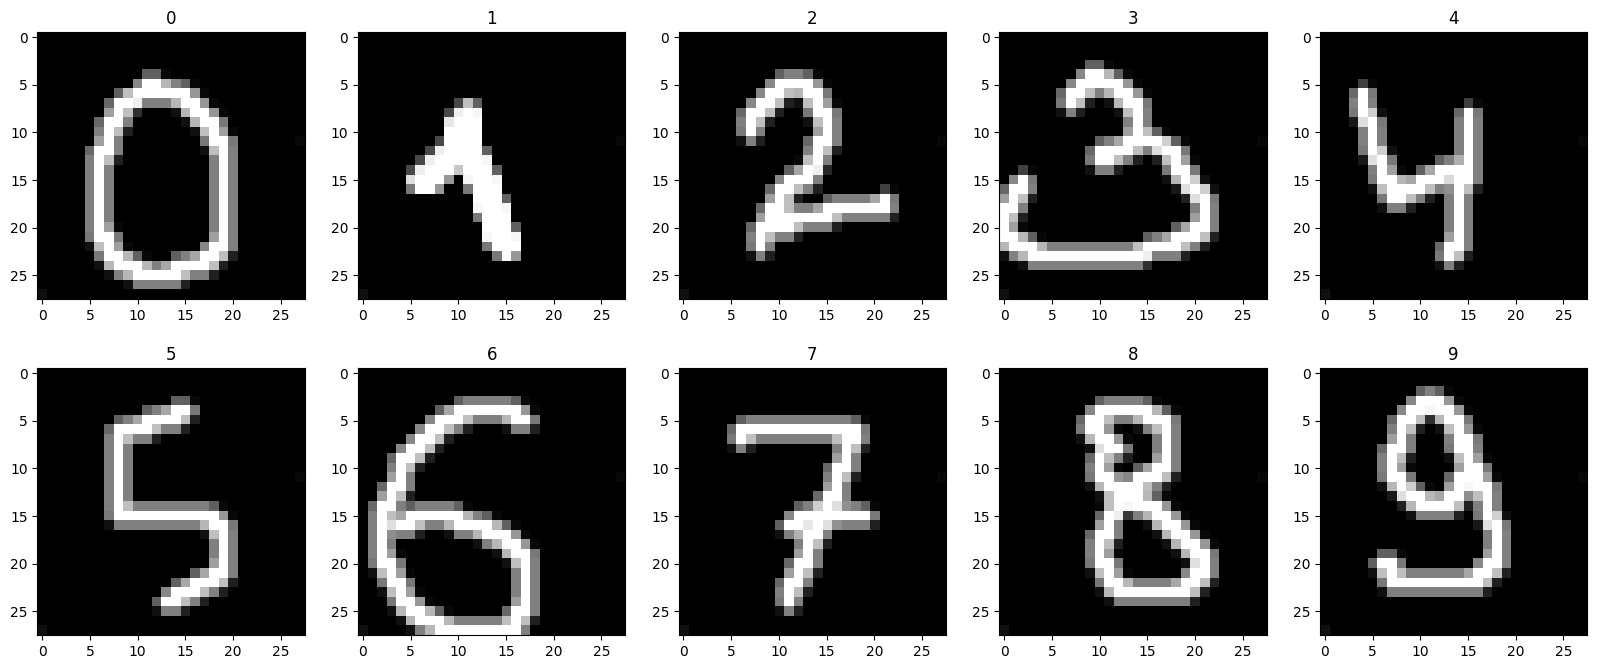

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


[0, 8, 2, 3, 1, 5, 3, 7, 3, 3]

In [71]:
import numpy as np

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
imgs = []
for i in range(num_classes):
    img = np.array(keras.preprocessing.image.load_img(f"{i}.png", target_size=(28, 28), color_mode="grayscale"))
    img = img.astype('float32')
    j = 1 if i >= 5 else 0
    ax[j, i % 5].imshow(img, cmap='gray')
    ax[j, i % 5].set_title(i)
    imgs.append(img)

plt.show()

predicts = model.predict(np.array(imgs).reshape(len(imgs), 784))
res = []
for pred in predicts:
    res.append(int(np.argmax(pred)))

res